# Comparison of the Average Sentiment of the Last 3000 Tweets by the 2016 Presidential Nominees and Top Prospective 2020 Democratic Presidential Candidates
## Author: Siddharth Nanda

In [1]:
# Package imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from afinn import Afinn
import twitter

In [2]:
# Twitter Handles for Each Politician

# 2016 Nominees
trump = 'realDonaldTrump'
clinton = 'HillaryClinton'

# Top 6 Prospects
biden = 'JoeBiden'
booker = 'CoryBooker'
sanders = 'BernieSanders'

harris = 'KamalaHarris'
gillibrand = 'SenGillibrand'
warren = 'elizabethforma'

In [3]:
# Lists for each politician's tweets
trump_data = list(twitter.tweets_favorites_retweets(trump)['tweets'])
clinton_data = list(twitter.tweets_favorites_retweets(clinton)['tweets'])

biden_data = list(twitter.tweets_favorites_retweets(biden)['tweets'])
booker_data = list(twitter.tweets_favorites_retweets(booker)['tweets'])
sanders_data = list(twitter.tweets_favorites_retweets(sanders)['tweets'])

harris_data = list(twitter.tweets_favorites_retweets(harris)['tweets'])
gillibrand_data = list(twitter.tweets_favorites_retweets(gillibrand)['tweets'])
warren_data = list(twitter.tweets_favorites_retweets(warren)['tweets'])

In [4]:
# Small function that returns the average Afinn sentiment score for the President's tweets
def avgScore(tweets):
    afinn = Afinn()
    score = 0
    counter = 0
    for tweet in tweets:
        score += afinn.score(tweet)
        counter += 1
    return score/counter

In [5]:
# Creates various series that contain labels/data and combines them into a dataframe that seaborn can use
politicians = pd.Series(['President Donald J. Trump', 'Hillary Clinton', 'Joe Biden', 'Cory Booker', 
                        'Bernie Sanders', 'Kamala Harris', 'Kristen Gillibrand', 'Elizabeth Warren'])
data = pd.Series([avgScore(trump_data), avgScore(clinton_data), avgScore(biden_data), avgScore(booker_data),
                  avgScore(sanders_data), avgScore(harris_data), avgScore(gillibrand_data), avgScore(warren_data)])

poli_data = pd.DataFrame({'Politician': politicians, 'Sentiment': data})

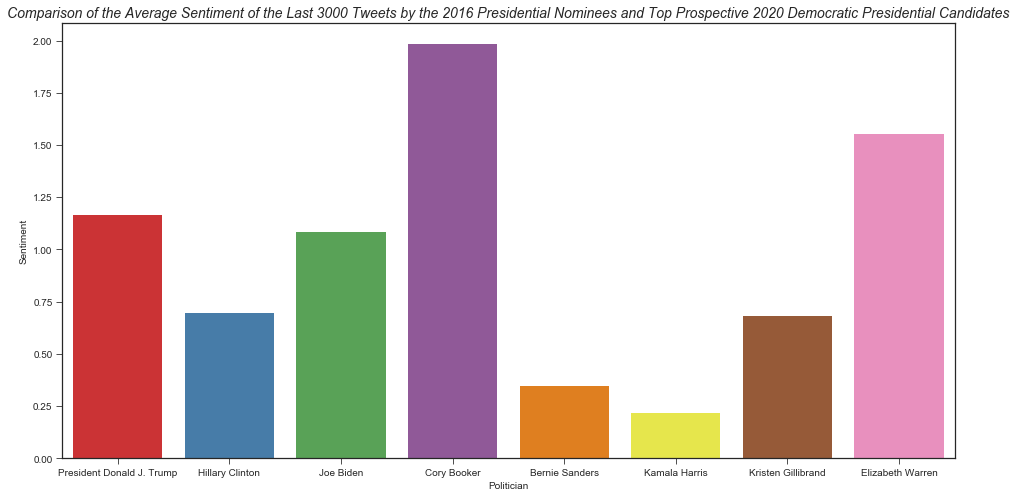

In [6]:
# Creates figure comparing the Average Sentiment of Tweets by the 44th and 45th Presidents
sns.set_style('ticks')
pal = sns.color_palette("Set1", 25)
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
plt.title("Comparison of the Average Sentiment of the Last 3000 Tweets by the 2016 Presidential Nominees and Top Prospective 2020 Democratic Presidential Candidates",
          fontstyle='italic', fontsize=14)
sns.barplot(x="Politician", y ='Sentiment', palette=pal, data=poli_data)

Examination of the average sentiment was conducted using the Afinn library which uses a sentiment lexicon that scores terms with a valence that indicates whether the term used was negative (with a highly negative integer indicating a highly negative sentiment) or positive (with a highly positive integer indicating a highly positive sentiment). While none of the politicians in this case study had an average sentiment that was negative, the contrast between newcomers into the political mainstream (such as Cory Booker or Bernie Sanders, with their above and below average sentiment scores) and traditional establishment politicians (such as the Clinton endorsed Gillibrand and Clinton herself) is on clear display. In addition, sentiment scores reflect each politician's messaging strategy (such as Booker's highly positive messaging and Harris' aggressive but neutral strategy, both of which are on display in the word frequency analysis). The surprise in the results is clear: President Trump's middle-of-the-road score, considering his well known aggressive and polarizing style. This can likely be attributed to his praise of his own administration and Congress which balances his attacks on his opponents. 